In [38]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

In [39]:
#data = pd.read_excel("query_result_2018-07-11_09-00-00.xlsx")

In [40]:
data = pd.read_csv("query_result_2018-07-09_10.00.00.csv")

In [41]:
#data = pd.concat([data, data2])

In [42]:
data.head()

,fm_fa07_31031200.idacq,fm_fa07_31031200.horodate,fm_fa07_31031200.idvar,fm_fa07_31031200.varname,fm_fa07_31031200.value,fm_fa07_31031200.duree,fm_fa07_31031200.varscalea,fm_fa07_31031200.varscaleb
0,4354,2018-07-09 10:00:00.0,361.0,Z3_Valeur capteur de l'anémomètre (BP192HF),15,510.0,1.0,0.0
1,4354,2018-07-09 10:00:00.028,418.0,RM_Z2_Valeur capteur de vide,25,1371.0,0.1,0.0
2,4354,2018-07-09 10:00:00.081,636.0,Z3FRG1.Et.E13Depressurisation,0,0.0,1.0,0.0
3,4354,2018-07-09 10:00:00.081,637.0,Z3FRG1.Et.E14Mise a niveau,1,7006.0,1.0,0.0
4,4354,2018-07-09 10:00:00.102,641.0,Z1_FR Valeur capteur de vide,25,217.0,0.1,0.0


In [43]:
dicovar = {"fm_fa07_31031200.idacq": "ID_DIZI",
           "fm_fa07_31031200.horodate": "Horodate",
           "fm_fa07_31031200.idvar": "ID_Variable",
           "fm_fa07_31031200.varname": "Name_Variable",
           "fm_fa07_31031200.value": "Value",
           "fm_fa07_31031200.duree": "Duration",
           "fm_fa07_31031200.varscalea": "Slope",
           "fm_fa07_31031200.varscaleb": "Constant"}
data.rename(columns=dicovar, inplace=True)

In [44]:
data.head().T

,0,1,2,3,4
ID_DIZI,4354,4354,4354,4354,4354
Horodate,2018-07-09 10:00:00.0,2018-07-09 10:00:00.028,2018-07-09 10:00:00.081,2018-07-09 10:00:00.081,2018-07-09 10:00:00.102
ID_Variable,361,418,636,637,641
Name_Variable,Z3_Valeur capteur de l'anémomètre (BP192HF),RM_Z2_Valeur capteur de vide,Z3FRG1.Et.E13Depressurisation,Z3FRG1.Et.E14Mise a niveau,Z1_FR Valeur capteur de vide
Value,15,25,0,1,25
Duration,510,1371,0,7006,217
Slope,1,0.1,1,1,0.1
Constant,0,0,0,0,0


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_Variable,956115.0,448.495369,217.992454,15.0,331.0,428.0,644.0,984.0
Duration,956115.0,2167.612381,11663.355897,0.0,146.0,239.0,306.0,343380.0
Slope,956115.0,0.811704,0.366075,0.1,1.0,1.0,1.0,1.0
Constant,956115.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [46]:
data["Name_Variable"].drop_duplicates().reset_index(drop=True)

0            Z3_Valeur capteur de l'anémomètre (BP192HF)
1                           RM_Z2_Valeur capteur de vide
2                          Z3FRG1.Et.E13Depressurisation
3                             Z3FRG1.Et.E14Mise a niveau
4                           Z1_FR Valeur capteur de vide
5                                       PRESSION VIDE RM
6                           RM_Z1_Valeur capteur de vide
7             Z1_FR Valeur capteur de pression de charge
8                                              DEBIT HFO
9                    Z1_Valeur capteur de vide (BP165HF)
10                                                   NaN
11     Z2_Valeur capteur de pression de charge (BP171HF)
12            Z2_FR Valeur capteur de pression de charge
13                          Z2_FR Valeur capteur de vide
14            Z3_FR Valeur capteur de pression de charge
15     Z3_Valeur capteur de pression de charge (BP171HF)
16           Z1_Valeur capteur de l'anémomètre (BP192HF)
17              Z3 RM - Pressos

In [47]:
z1_list_var = [var for var in data["Name_Variable"].drop_duplicates().tolist() if str(var)[0:2]=='Z1']

In [48]:
z1_list_var[0:50]

['Z1_FR Valeur capteur de vide',
 'Z1_FR Valeur capteur de pression de charge',
 'Z1_Valeur capteur de vide (BP165HF)',
 "Z1_Valeur capteur de l'anémomètre (BP192HF)",
 'Z1_Valeur capteur de température',
 'Z1_Valeur capteur de pression de charge (BP171HF)',
 'Z1 FR - Double pression de charge',
 'Z1 FR - Ligne de vide',
 'Z1FRG1.Et.E07Vide 1',
 'Z1FRG1.Et.E08Controle vide',
 'Z1 RM - Isolation pompe a vide',
 'Z1 RM - Ligne de vide',
 'Z1 RM - Alimentation Ejecteur',
 'Z1RMG1.Et.E07Vide 1',
 'Z1RMG1.Et.E08Controle vide',
 'Z1_N° etape - Remplissage RM',
 'Z1FRG1.Et.E09Vide 2',
 'Z1 FR - Vide adaptateur',
 'Z1FRG1.Et.E10Fin de vide',
 'Z1RMG1.Et.E09Vide 2',
 'Z1 FR - Vide dans r?servoir liquide',
 'Z1 FR - Charge adaptateur',
 'Z1FRG1.Et.E11Charge',
 'Z1 RM - Vide adaptateur',
 'Z1 RM - Pressurisation pi?ge de mise ? niveau',
 'Z1 RM - Vidange pi?ge mise a niveau m?lange 1',
 'Z1RMG1.Et.E10Fin de vide',
 'Z1 FR - Niveau r?gulation r?servoir remplissage',
 'Z1RMG1.Et.E11Charge',
 'Z1 RM

In [49]:
z1_list_var[50:100]

['Z1HFG1.Et.E12Fin de charge',
 'Z1 RM - Isolation capteur de vide',
 'Z1 HF - Isolation capteur de vide',
 'Z1 HF - Ouverture port adaptateur HP',
 'Z1 HF - Fermeture port adaptateur HP',
 'Z1HFG1.Et.E13Attente Racrochage adaptateur',
 'Z1 FR - Alimentation charge',
 'Z1FRG1.Et.E12Fin de charge',
 'Z1 FR - Mise a niveau adaptateur',
 'Z1FRG1.Et.E13Depressurisation',
 'Z1RMG1.Et.E12Fin de charge',
 'Z1 RM - Pressurisation ligne de vide',
 'Z1RMG1.Et.E13Depressurisation',
 'Z1 RM - Mise a \xa0niveau',
 'Z1FRG1.Et.E14Mise a niveau',
 'Z1 FR - Alimentation Ejecteur',
 'Z1 FR - Vidange reservoir liquide',
 'Z1 HF - R?cup?ration flexible',
 'Z1 HF - Alimentation surpresseur',
 "Z1 FR - Mise a l'atmosph?re r?servoir liquide",
 'Z1RMG1.Et.E14Mise a niveau',
 'Z1 FR - Pressostat pr?-vide par ?jecteur',
 'Z1 FR - Niveau r?gulation r?servoir liquide',
 'Z1 RM - Pressostat pr?-vide par ?jecteur',
 'Z1FRG1.Et.E15Attente deverouillage',
 "Z1 HF - Mise a l'atmosph?re capteur de vide",
 'Z1 FR - Verr

In [50]:
z1_list_var[100:]

['Z1HFG1.Et.E15Lancement vidange',
 'Z1_HF_N° etape - Lancement vidange',
 'Z1 HF - Ligne de charge',
 'Z1_Valeur de vide',
 'Z1_Valeur de vide en vide 2',
 'Z1_Valeur de vide en controle vide',
 'Z1 MT - Retour RFR \xa0(utilis? par bloc fonction LVAR)',
 'Z1G.PJI (PJI)',
 'Z1 MT - D?tecteur origine',
 'Z1 MT - D?tecteur pr?-alarme',
 'Z1HFG1.Et.E01Hors cycle',
 'Z1_HF_N° etape - Diagnostique',
 'Z1_Seuil vide residuel (BP165HF)',
 'Z1_Seuil grosse fuite sous vide (BP165HF)',
 'Z1_Seuil petite fuite sous vide (BP165HF)',
 'Z1_Seuil ligne de vide diagnostique global (BP165HF)',
 'Z1_Seuil vide effectif reference 1 et 2 (BP165HF)',
 'Z1_Seuil etancheite vanne de vide adaptateur (BP165HF)',
 'Z1_Seuil vide effectif ouverture HP (BP165HF)',
 'Z1_Seuil vide effectif ouverture BP (BP165HF)',
 'Z1_Seuil variation capteur de vide (BP165HF)',
 'Z1 FR - Alimentation liquide',
 'Z1_N° etape - Remplissage RM = 1',
 'Z1_Seuil récupération par pompe à vide OK (BP165HF)',
 'Z1HFG1.Et.E02Adaptateur de

HF / HFO : Air conditionné (hydrogene - fréon)
RM : Refroidissement moteur 
FR : Frein

In [51]:
def print_serie(varname):
    serie = data.loc[data["Name_Variable"] == varname,:].reset_index()
    serie["Computed_Value"] = serie["Constant"] + serie["Slope"] * serie["Value"]
    serie.index = serie["Horodate"]
    serie = serie.loc[:, ["Computed_Value", "Duration"]]
    serie.Computed_Value.plot()

In [52]:
print_serie("Z1 FR - Vide dans r?servoir liquide")

TypeError: can't multiply sequence by non-int of type 'float'

In [73]:
data_Z3_pression_charge = data.loc[data["Name_Variable"] == "Z3_Valeur capteur de pression de charge",:].reset_index()

In [74]:
data_Z3_pression_charge.describe()

,index,ID_DIZI,ID_Variable,Value,Duration,Slope,Constant
count,2220.000000,2220.0,2220.0,2220.000000,2220.000000,2220.0,2220.0
mean,113887.088288,4404.0,419.0,119.087838,668.070721,1.0,0.0
std,65928.429970,0.0,0.0,70.393012,6857.149359,0.0,0.0
min,0.000000,4404.0,419.0,0.000000,0.000000,1.0,0.0
25%,53892.750000,4404.0,419.0,57.000000,190.000000,1.0,0.0
50%,116009.500000,4404.0,419.0,86.000000,210.000000,1.0,0.0
75%,170801.500000,4404.0,419.0,194.000000,381.250000,1.0,0.0
max,226285.000000,4404.0,419.0,203.000000,140301.000000,1.0,0.0


In [75]:
data_Z3_pression_charge.head().T

,0,1,2,3,4
index,0,47,60,76,152
ID_DIZI,4404,4404,4404,4404,4404
Horodate,2018-07-11 09:00:00.010000,2018-07-11 09:00:00.588000,2018-07-11 09:00:00.784000,2018-07-11 09:00:00.975000,2018-07-11 09:00:01.784000
ID_Variable,419,419,419,419,419
Name_Variable,Z3_Valeur capteur de pression de charge,Z3_Valeur capteur de pression de charge,Z3_Valeur capteur de pression de charge,Z3_Valeur capteur de pression de charge,Z3_Valeur capteur de pression de charge
Value,194,195,194,195,194
Duration,578,196,191,809,205
Slope,1,1,1,1,1
Constant,0,0,0,0,0


In [76]:
data_Z3_pression_charge["Computed_Value"] = data_Z3_pression_charge["Constant"] + data_Z3_pression_charge["Slope"] * data_Z3_pression_charge["Value"]

In [77]:
data_Z3_pression_charge.index = data_Z3_pression_charge["Horodate"]

In [78]:
data_Z3_pression_charge = data_Z3_pression_charge.loc[:, ["Computed_Value", "Duration"]]

In [79]:
data_Z3_pression_charge.head()

,Computed_Value,Duration
Horodate,,
2018-07-11 09:00:00.010,194.0,578
2018-07-11 09:00:00.588,195.0,196
2018-07-11 09:00:00.784,194.0,191
2018-07-11 09:00:00.975,195.0,809
2018-07-11 09:00:01.784,194.0,205


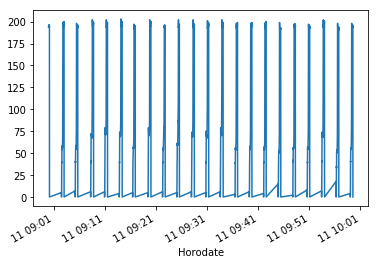

In [80]:
data_Z3_pression_charge.Computed_Value.plot()

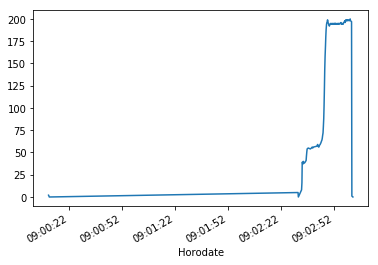

In [82]:
data_Z3_pression_charge.iloc[25:128, 0].plot()

In [86]:
data_Z3_pression_charge.iloc[25:128,:]

,Computed_Value,Duration
Horodate,,
2018-07-11 09:00:10.548,2.0,240
2018-07-11 09:00:10.788,1.0,174
2018-07-11 09:00:10.962,0.0,0
2018-07-11 09:02:31.713,5.0,173
2018-07-11 09:02:31.886,0.0,1811
2018-07-11 09:02:33.697,8.0,212
2018-07-11 09:02:33.909,16.0,161
2018-07-11 09:02:34.070,39.0,421
2018-07-11 09:02:34.491,37.0,187


In [87]:
data_Z3_pression_charge.iloc[125:225,:]

,Computed_Value,Duration
Horodate,,
2018-07-11 09:03:01.982,197.0,176
2018-07-11 09:03:02.158,1.0,589
2018-07-11 09:03:02.747,0.0,129571
2018-07-11 09:05:12.318,7.0,208
2018-07-11 09:05:12.526,0.0,1785
2018-07-11 09:05:14.311,8.0,178
2018-07-11 09:05:14.489,15.0,213
2018-07-11 09:05:14.702,38.0,205
2018-07-11 09:05:14.907,39.0,184


In [88]:
data_Z3_pression_charge.iloc[225:325,:]

,Computed_Value,Duration
Horodate,,
2018-07-11 09:05:42.611,194.0,194
2018-07-11 09:05:42.805,0.0,182
2018-07-11 09:05:42.987,2.0,208
2018-07-11 09:05:43.195,1.0,225
2018-07-11 09:05:43.420,0.0,0
2018-07-11 09:08:14.070,6.0,189
2018-07-11 09:08:14.259,0.0,1798
2018-07-11 09:08:16.057,8.0,205
2018-07-11 09:08:16.262,14.0,186


In [90]:
data_Z3_pression_charge["New_Cycle"] = 0
condition = (data_Z3_pression_charge.Duration > 1500) & (data_Z3_pression_charge.Computed_Value < 10)
data_Z3_pression_charge.loc[condition, "New_Cycle"] = 1

In [92]:
New_Cycle_DF = data_Z3_pression_charge.loc[data_Z3_pression_charge.New_Cycle == 1, :]

In [93]:
New_Cycle_DF["ID_Cycle"] = New_Cycle_DF.New_Cycle.cumsum()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
New_Cycle_DF

,Computed_Value,Duration,New_Cycle,ID_Cycle
Horodate,,,,
2018-07-11 09:02:31.886,0.0,1811,1,1
2018-07-11 09:03:02.747,0.0,129571,1,2
2018-07-11 09:05:12.526,0.0,1785,1,3
2018-07-11 09:08:14.259,0.0,1798,1,4
2018-07-11 09:08:48.967,0.0,128985,1,5
2018-07-11 09:10:58.105,0.0,1799,1,6
2018-07-11 09:13:49.989,0.0,1769,1,7
2018-07-11 09:14:24.673,0.0,122784,1,8
2018-07-11 09:16:27.647,0.0,1799,1,9


In [102]:
data_Z3_pression_charge["ID_Cycle"] = np.nan
for start_cycle_horodate, end_cycle_horodate, ID_Cycle in zip(New_Cycle_DF.index.tolist(),
                                                              New_Cycle_DF.index.tolist()[1:],
                                                              New_Cycle_DF.ID_Cycle.tolist()):
    condition = (data_Z3_pression_charge.index >= start_cycle_horodate) \
                & (data_Z3_pression_charge.index < end_cycle_horodate)
    data_Z3_pression_charge.loc[condition,"ID_Cycle"] = ID_Cycle

In [105]:
data_Z3_pression_charge.iloc[225:365,:]

,Computed_Value,Duration,New_Cycle,ID_Cycle
Horodate,,,,
2018-07-11 09:05:42.611,194.0,194,0,3.0
2018-07-11 09:05:42.805,0.0,182,0,3.0
2018-07-11 09:05:42.987,2.0,208,0,3.0
2018-07-11 09:05:43.195,1.0,225,0,3.0
2018-07-11 09:05:43.420,0.0,0,0,3.0
2018-07-11 09:08:14.070,6.0,189,0,3.0
2018-07-11 09:08:14.259,0.0,1798,1,4.0
2018-07-11 09:08:16.057,8.0,205,0,4.0
2018-07-11 09:08:16.262,14.0,186,0,4.0


In [108]:
data_Z3_pression_charge.groupby("ID_Cycle")["Computed_Value"].describe()

,count,mean,std,min,25%,50%,75%,max
ID_Cycle,,,,,,,,
1.0,98.0,137.755102,70.669561,0.0,58.25,194.0,195.00,200.0
2.0,2.0,3.500000,4.949747,0.0,1.75,3.5,5.25,7.0
3.0,102.0,110.656863,73.372978,0.0,54.00,67.0,194.00,198.0
4.0,118.0,120.627119,67.007436,0.0,70.00,81.5,195.00,202.0
5.0,2.0,3.000000,4.242641,0.0,1.50,3.0,4.50,6.0
6.0,116.0,121.793103,66.492957,0.0,73.00,81.5,195.00,202.0
7.0,109.0,127.201835,68.023795,0.0,70.00,110.0,196.00,203.0
8.0,2.0,2.500000,3.535534,0.0,1.25,2.5,3.75,5.0
9.0,98.0,112.826531,72.215460,0.0,56.00,68.5,194.00,197.0


In [113]:
data_Z3_pression_charge["Horodate"] = data_Z3_pression_charge.index
data_Z3_pression_charge.groupby("ID_Cycle")["Horodate"].describe()

,count,unique,top,freq,first,last
ID_Cycle,,,,,,
1.0,98,98,2018-07-11 09:02:35.262000,1,2018-07-11 09:02:31.886000,2018-07-11 09:03:02.158000
2.0,2,2,2018-07-11 09:03:02.747000,1,2018-07-11 09:03:02.747000,2018-07-11 09:05:12.318000
3.0,102,102,2018-07-11 09:05:17.875000,1,2018-07-11 09:05:12.526000,2018-07-11 09:08:14.070000
4.0,118,118,2018-07-11 09:08:25.034000,1,2018-07-11 09:08:14.259000,2018-07-11 09:08:48.786000
5.0,2,2,2018-07-11 09:08:48.967000,1,2018-07-11 09:08:48.967000,2018-07-11 09:10:57.952000
6.0,116,116,2018-07-11 09:11:21.057000,1,2018-07-11 09:10:58.105000,2018-07-11 09:13:49.767000
7.0,109,109,2018-07-11 09:14:13.325000,1,2018-07-11 09:13:49.989000,2018-07-11 09:14:24.475000
8.0,2,2,2018-07-11 09:16:27.457000,1,2018-07-11 09:14:24.673000,2018-07-11 09:16:27.457000
9.0,98,98,2018-07-11 09:16:41.006000,1,2018-07-11 09:16:27.647000,2018-07-11 09:19:27.584000


In [122]:
data_Z3_pression_charge.groupby("ID_Cycle")["Horodate"].apply(lambda x: x.max() - x.min())

ID_Cycle
1.0    00:00:30.272000
2.0    00:02:09.571000
3.0    00:03:01.544000
4.0    00:00:34.527000
5.0    00:02:08.985000
6.0    00:02:51.662000
7.0    00:00:34.486000
8.0    00:02:02.784000
9.0    00:02:59.937000
10.0   00:02:50.762000
11.0   00:02:47.378000
12.0   00:02:51.052000
13.0   00:00:34.340000
14.0   00:02:13.688000
15.0   00:02:49.406000
16.0          00:02:53
17.0   00:02:48.181000
18.0   00:02:47.565000
19.0   00:00:30.499000
20.0   00:02:20.301000
21.0   00:02:51.040000
22.0   00:00:30.497000
23.0   00:02:17.454000
24.0   00:02:49.813000
25.0   00:02:51.432000
26.0   00:02:45.201000
Name: Horodate, dtype: timedelta64[ns]

In [143]:
def compute_cycle_duration(dataframe):
    return dataframe["Horodate"].max() - dataframe["Horodate"].min(), dataframe["Horodate"].count()

In [144]:
data_Z3_pression_charge.groupby("ID_Cycle").apply(compute_cycle_duration)

ID_Cycle
1.0      (0 days 00:00:30.272000, 98)
2.0       (0 days 00:02:09.571000, 2)
3.0     (0 days 00:03:01.544000, 102)
4.0     (0 days 00:00:34.527000, 118)
5.0       (0 days 00:02:08.985000, 2)
6.0     (0 days 00:02:51.662000, 116)
7.0     (0 days 00:00:34.486000, 109)
8.0       (0 days 00:02:02.784000, 2)
9.0      (0 days 00:02:59.937000, 98)
10.0    (0 days 00:02:50.762000, 109)
11.0    (0 days 00:02:47.378000, 109)
12.0     (0 days 00:02:51.052000, 98)
13.0    (0 days 00:00:34.340000, 115)
14.0      (0 days 00:02:13.688000, 2)
15.0    (0 days 00:02:49.406000, 116)
16.0            (0 days 00:02:53, 99)
17.0     (0 days 00:02:48.181000, 93)
18.0    (0 days 00:02:47.565000, 105)
19.0     (0 days 00:00:30.499000, 94)
20.0      (0 days 00:02:20.301000, 2)
21.0     (0 days 00:02:51.040000, 99)
22.0     (0 days 00:00:30.497000, 93)
23.0      (0 days 00:02:17.454000, 2)
24.0     (0 days 00:02:49.813000, 95)
25.0    (0 days 00:02:51.432000, 123)
26.0     (0 days 00:02:45.201000, 93)
dty